In [1]:
import numpy as np 
import pandas as pd            
import matplotlib.pyplot as plt
import seaborn as sns          
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler     
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

In [3]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [4]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [5]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [6]:
df.shape

(1000, 40)

In [7]:
df.fraud_reported.unique()

array(['Y', 'N'], dtype=object)

In [8]:
df.fraud_reported.value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

<AxesSubplot:>

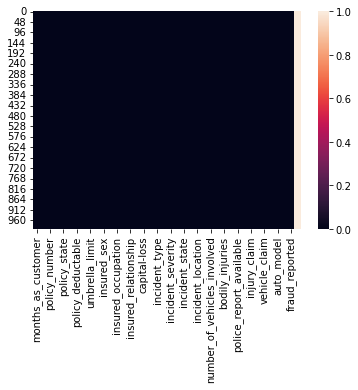

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

Data Visualisation

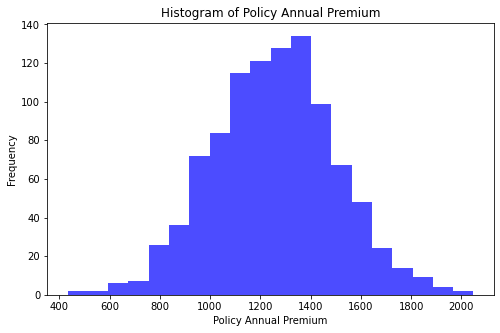

In [11]:
#Univariate analysis
plt.figure(figsize=(8, 5))
plt.hist(df['policy_annual_premium'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Policy Annual Premium')
plt.ylabel('Frequency')
plt.title('Histogram of Policy Annual Premium')
plt.show()

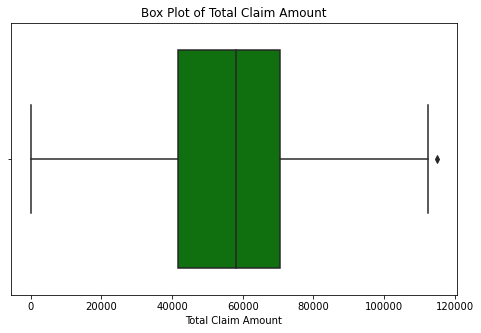

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['total_claim_amount'], color='green')
plt.xlabel('Total Claim Amount')
plt.title('Box Plot of Total Claim Amount')
plt.show()

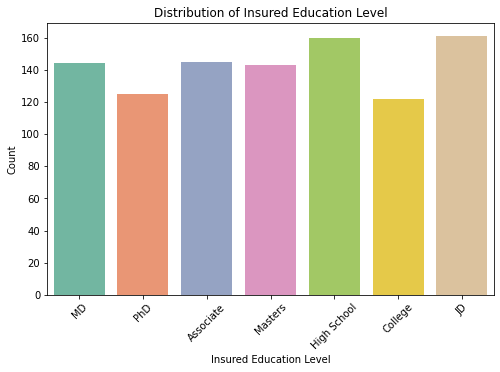

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(x='insured_education_level', data=df, palette='Set2')
plt.xlabel('Insured Education Level')
plt.ylabel('Count')
plt.title('Distribution of Insured Education Level')
plt.xticks(rotation=45)
plt.show()

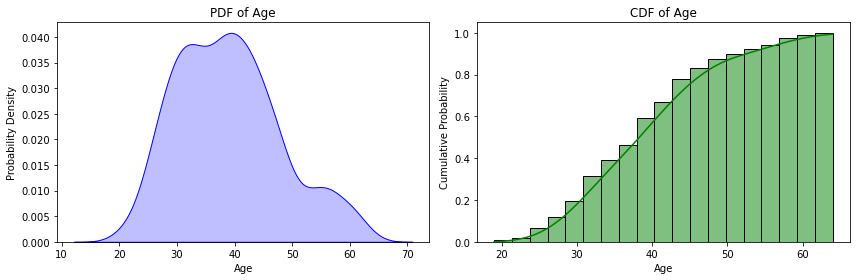

In [14]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.kdeplot(df['age'], shade=True, color='blue')
plt.xlabel('Age')
plt.ylabel('Probability Density')
plt.title('PDF of Age')

plt.subplot(1, 2, 2)
sns.histplot(df['age'], cumulative=True, stat='density', kde=True, color='green')
plt.xlabel('Age')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Age')
plt.tight_layout()
plt.show()

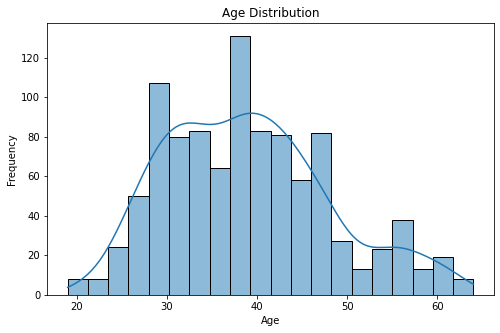

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

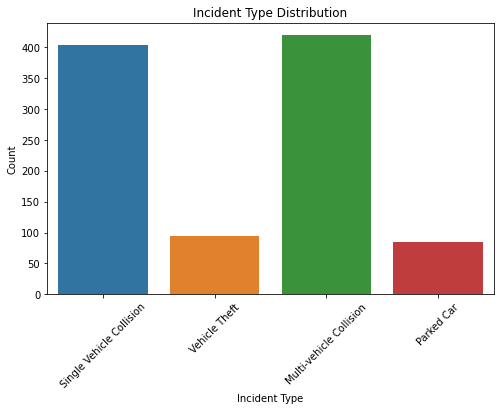

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(x='incident_type', data=df)
plt.xlabel('Incident Type')
plt.ylabel('Count')
plt.title('Incident Type Distribution')
plt.xticks(rotation=45)
plt.show()

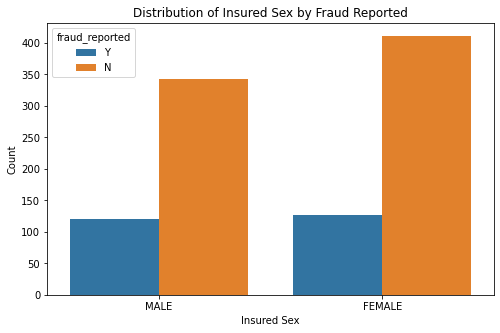

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(x='insured_sex', hue='fraud_reported', data=df)
plt.xlabel('Insured Sex')
plt.ylabel('Count')
plt.title('Distribution of Insured Sex by Fraud Reported')
plt.show()

Bivariate Analysis

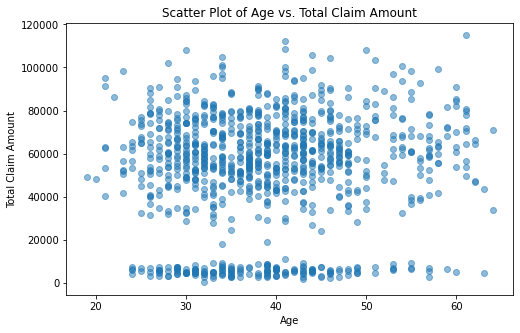

In [18]:
plt.figure(figsize=(8, 5))
plt.scatter(df['age'], df['total_claim_amount'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Total Claim Amount')
plt.title('Scatter Plot of Age vs. Total Claim Amount')
plt.show()

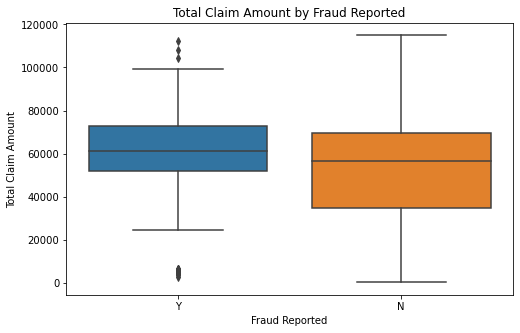

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='fraud_reported', y='total_claim_amount', data=df)
plt.xlabel('Fraud Reported')
plt.ylabel('Total Claim Amount')
plt.title('Total Claim Amount by Fraud Reported')
plt.show()

<Figure size 576x360 with 0 Axes>

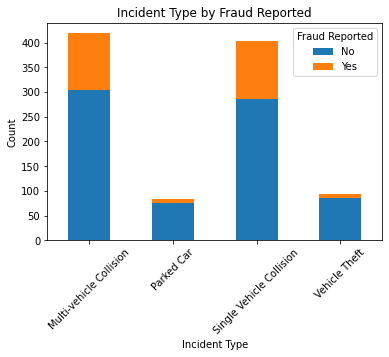

In [20]:
plt.figure(figsize=(8, 5))
pd.crosstab(df['incident_type'], df['fraud_reported']).plot(kind='bar', stacked=True)
plt.xlabel('Incident Type')
plt.ylabel('Count')
plt.title('Incident Type by Fraud Reported')
plt.xticks(rotation=45)
plt.legend(title='Fraud Reported', loc='upper right', labels=['No', 'Yes'])
plt.show()

Multivariate Analysis

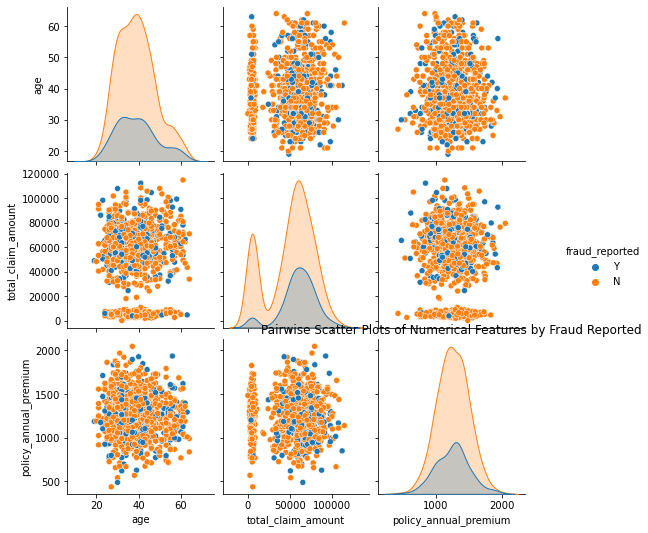

In [21]:
sns.pairplot(df[['age', 'total_claim_amount', 'policy_annual_premium', 'fraud_reported']], hue='fraud_reported')
plt.title('Pairwise Scatter Plots of Numerical Features by Fraud Reported')
plt.show()

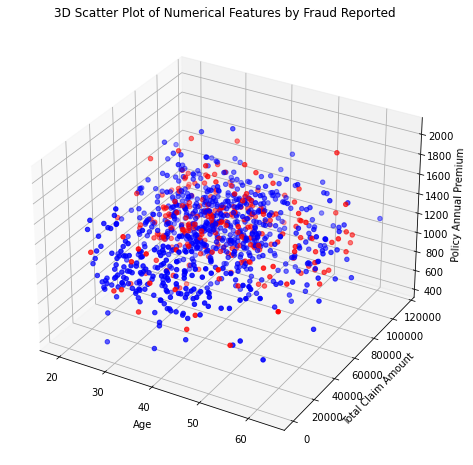

In [22]:
from mpl_toolkits.mplot3d import Axes3D

color_mapping = {'Y': 'red', 'N': 'blue'}

colors = df['fraud_reported'].map(color_mapping)


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'], df['total_claim_amount'], df['policy_annual_premium'], c=colors)
ax.set_xlabel('Age')
ax.set_ylabel('Total Claim Amount')
ax.set_zlabel('Policy Annual Premium')
plt.title('3D Scatter Plot of Numerical Features by Fraud Reported')
plt.show()

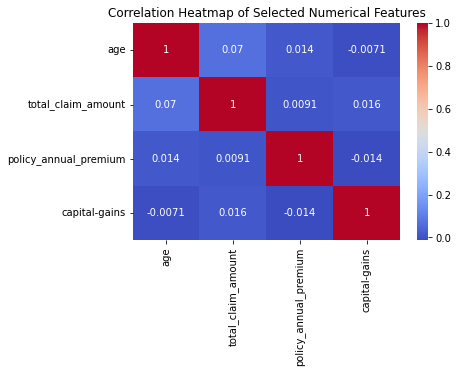

In [23]:
selected_features = ['age', 'total_claim_amount', 'policy_annual_premium', 'capital-gains']
correlation_matrix = df[selected_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Selected Numerical Features')
plt.show()

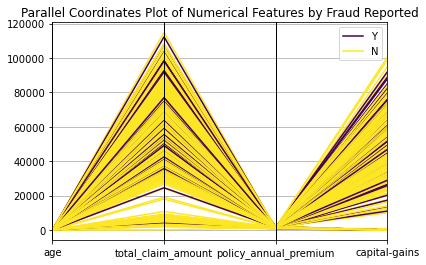

In [24]:
from pandas.plotting import parallel_coordinates

selected_features = ['age', 'total_claim_amount', 'policy_annual_premium', 'capital-gains', 'fraud_reported']
parallel_coordinates(df[selected_features], 'fraud_reported', colormap='viridis')
plt.title('Parallel Coordinates Plot of Numerical Features by Fraud Reported')
plt.show()

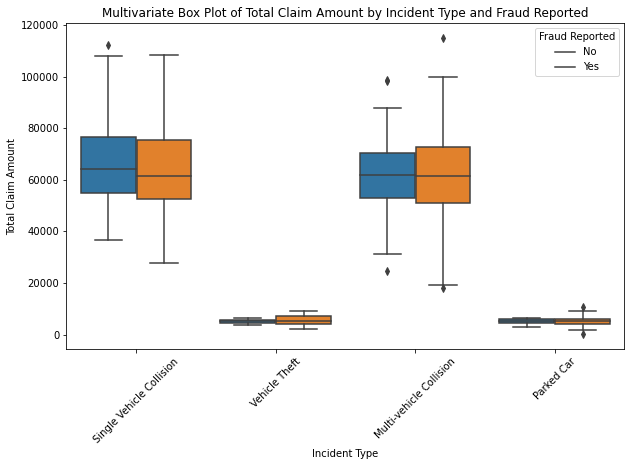

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='incident_type', y='total_claim_amount', hue='fraud_reported', data=df)
plt.xlabel('Incident Type')
plt.ylabel('Total Claim Amount')
plt.title('Multivariate Box Plot of Total Claim Amount by Incident Type and Fraud Reported')
plt.xticks(rotation=45)
plt.legend(title='Fraud Reported', loc='upper right', labels=['No', 'Yes'])
plt.show()

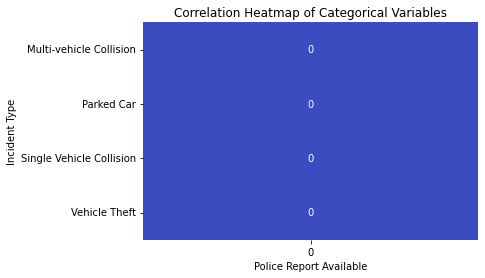

In [26]:
import scipy.stats as stats

def cramers_v(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))


crosstab = pd.crosstab(df['incident_type'], df['police_report_available'])
crosstab_cramer = crosstab.apply(lambda x: cramers_v(x), axis=1)
sns.heatmap(pd.DataFrame(crosstab_cramer), annot=True, cmap='coolwarm', cbar=False)
plt.xlabel('Police Report Available')
plt.ylabel('Incident Type')
plt.title('Correlation Heatmap of Categorical Variables')
plt.show()

In [27]:
numerical_columns = df.select_dtypes(include=['number']) 
skewness = numerical_columns.apply(lambda x: x.skew())


print("Skewness for Numerical Columns:")
print(skewness)

Skewness for Numerical Columns:
months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
_c39                                NaN
dtype: float64


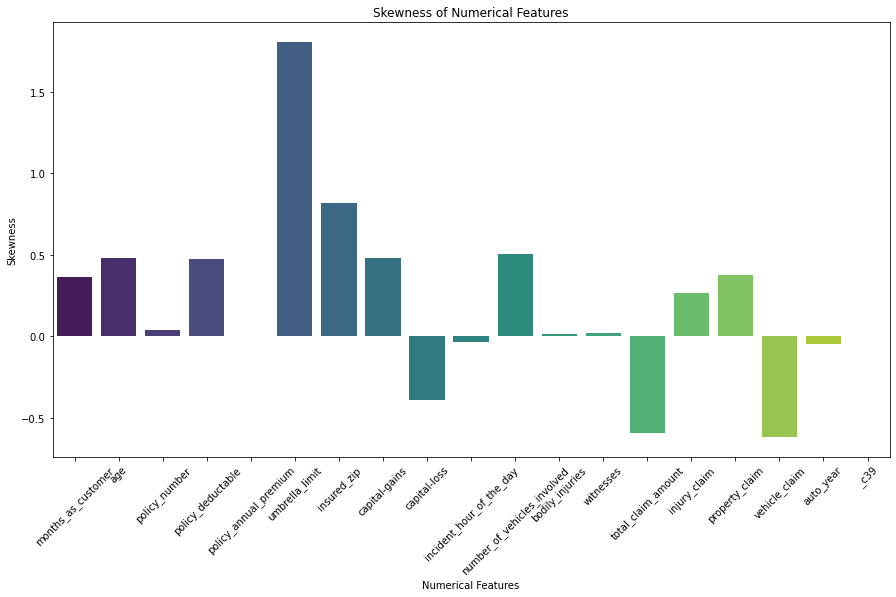

In [28]:
plt.figure(figsize=(15, 8))
sns.barplot(x=skewness.index, y=skewness.values, palette='viridis')
plt.xlabel('Numerical Features')
plt.ylabel('Skewness')
plt.title('Skewness of Numerical Features')
plt.xticks(rotation=45)
plt.show()

In [29]:
import plotly.express as px

fig = px.scatter(df, x='age', y='total_claim_amount', color='fraud_reported', title='Scatter Plot of Age vs. Total Claim Amount')

fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Total Claim Amount',
    legend_title='Fraud Reported'
)

fig.show()

In [30]:
df=df.replace('\?','',regex=True).astype(object)

In [31]:
df.property_damage.unique()

array(['YES', '', 'NO'], dtype=object)

In [32]:
df.head()

months_as_customer age policy_number policy_bind_date policy_state  \
0                328  48        521585       17-10-2014           OH   
1                228  42        342868       27-06-2006           IN   
2                134  29        687698       06-09-2000           OH   
3                256  41        227811       25-05-1990           IL   
4                228  44        367455       06-06-2014           IL   

  policy_csl policy_deductable policy_annual_premium umbrella_limit  \
0    250/500              1000               1406.91              0   
1    250/500              2000               1197.22        5000000   
2    100/300              2000               1413.14        5000000   
3    250/500              2000               1415.74        6000000   
4   500/1000              1000               1583.91        6000000   

  insured_zip  ... police_report_available total_claim_amount injury_claim  \
0      466132  ...                     YES              71610         6510   
1      468176  ...                                       5070          780   
2      430632  ...                      NO              34650         7700   
3      608117  ...                      NO              63400         6340   
4      610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make auto_model auto_year fraud_reported  \
0          13020         52080       Saab        92x      2004              Y   
1            780          3510   Mercedes       E400      2007              Y   
2           3850         23100      Dodge        RAM      2007              N   
3           6340         50720  Chevrolet      Tahoe      2014              Y   
4            650          4550     Accura        RSX      2009              N   

  _c39  
0  NaN  
1  NaN  
2  NaN  
3  NaN  
4  NaN  

[5 rows x 40 columns]

In [33]:
df._c39.unique()

array([nan], dtype=object)

Label Encoding

In [34]:
from sklearn import preprocessing 

le=preprocessing.LabelEncoder()

In [35]:
df=df.apply(le.fit_transform)
df

months_as_customer  age  policy_number  policy_bind_date  policy_state  \
0                   299   29            480               532             2   
1                   212   23            257               821             1   
2                   123   10            672               186             2   
3                   239   22            140               766             0   
4                   212   25            286               181             0   
..                  ...  ...            ...               ...           ...   
995                   3   19            935               487             2   
996                 266   22            101               129             0   
997                 119   15            902               509             2   
998                 377   43            500               573             0   
999                 376   41            523               359             2   

     policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0             1                  1                    732               1   
1             1                  2                    396               5   
2             0                  2                    740               5   
3             1                  2                    743               6   
4             2                  1                    902               6   
..          ...                ...                    ...             ...   
995           2                  1                    577               1   
996           0                  1                    765               1   
997           1                  0                    691               3   
998           2                  2                    652               5   
999           1                  1                     19               1   

     insured_zip  ...  police_report_available  total_claim_amount  \
0            486  ...                        2                 563   
1            519  ...                        0                  44   
2              6  ...                        1                 143   
3            812  ...                        1                 451   
4            850  ...                        1                  81   
..           ...  ...                      ...                 ...   
995           19  ...                        0                 705   
996          813  ...                        0                 760   
997          181  ...                        2                 507   
998          157  ...                        2                 224   
999          861  ...                        0                  43   

     injury_claim  property_claim  vehicle_claim  auto_make  auto_model  \
0             258             512            545         10           1   
1              46              45             38          8          12   
2             337             104            116          4          30   
3             245             249            521          3          34   
4              70              36             66          0          31   
..            ...             ...            ...        ...         ...   
995           624             379            664          6           6   
996           630             608            714         13          28   
997           324             330            554         11          19   
998           168             170            256          1           5   
999            17              53             42          8          12   

     auto_year  fraud_reported  _c39  
0            9               1     0  
1           12               1     0  
2           12               0     0  
3           19               1     0  
4           14               0     0  
..         ...             ...   ...  
995         11               0     0  
996         20               0     0  
997          1               0     0  

In [36]:
df.drop('_c39',axis=1,inplace=True)

In [37]:
correlation=df.corr()
correlation

months_as_customer       age  policy_number  \
months_as_customer                     1.000000  0.911296       0.059023   
age                                    0.911296  1.000000       0.061380   
policy_number                          0.059023  0.061380       1.000000   
policy_bind_date                       0.053206  0.056538       0.045938   
policy_state                          -0.000783 -0.014533       0.073149   
policy_csl                            -0.026295 -0.015185       0.038834   
policy_deductable                      0.016873  0.020561      -0.015075   
policy_annual_premium                  0.014294  0.017822       0.018033   
umbrella_limit                         0.017145  0.021924       0.013341   
insured_zip                            0.015904  0.013517      -0.000690   
insured_sex                            0.059153  0.073337       0.003588   
insured_education_level                0.000265  0.000969      -0.038415   
insured_occupation                     0.010330  0.017220      -0.012951   
insured_hobbies                       -0.096075 -0.081315       0.039250   
insured_relationship                   0.067755  0.074832       0.017498   
capital-gains                         -0.002832 -0.012514       0.002104   
capital-loss                           0.015991  0.006513      -0.010384   
incident_date                         -0.001464  0.002416       0.051570   
incident_type                         -0.014053 -0.025626       0.001314   
collision_type                        -0.017337 -0.018672      -0.012615   
incident_severity                     -0.052274 -0.058439      -0.016262   
authorities_contacted                  0.004792  0.015417       0.019457   
incident_state                         0.004622  0.005770      -0.011261   
incident_city                          0.004008 -0.002291      -0.035541   
incident_location                     -0.017183 -0.011101       0.015357   
incident_hour_of_the_day               0.072231  0.087161      -0.001261   
number_of_vehicles_involved            0.014040  0.022102       0.013945   
property_damage                        0.006509 -0.001486       0.004456   
bodily_injuries                       -0.012533 -0.015679      -0.005067   
witnesses                              0.057284  0.052359      -0.013730   
police_report_available                0.020082  0.014661       0.032358   
total_claim_amount                     0.055934  0.071265      -0.009532   
injury_claim                           0.064041  0.075124      -0.012413   
property_claim                         0.029788  0.060450      -0.003358   
vehicle_claim                          0.052742  0.059784      -0.014299   
auto_make                              0.044443  0.030410       0.024663   
auto_model                             0.001095  0.017343       0.064259   
auto_year                              0.002020  0.001354       0.000465   
fraud_reported                         0.017095  0.012143      -0.030222   

                             policy_bind_date  policy_state  policy_csl  \
months_as_customer                   0.053206     -0.000783   -0.026295   
age                                  0.056538     -0.014533   -0.015185   
policy_number                        0.045938      0.073149    0.038834   
policy_bind_date                     1.000000      0.015289    0.008486   
policy_state                         0.015289      1.000000    0.001027   
policy_csl                           0.008486      0.001027    1.000000   
policy_deductable                   -0.016906      0.008213    0.001986   
policy_annual_premium               -0.032003      0.014751    0.017161   
umbrella_limit                      -0.024888     -0.031793    0.022779   
insured_zip                         -0.032670      0.025074    0.006474   
insured_sex                          0.039338     -0.020481   -0.010757   
insured_education_level              0.040606     -0.034327    0.009153   
insured_occup

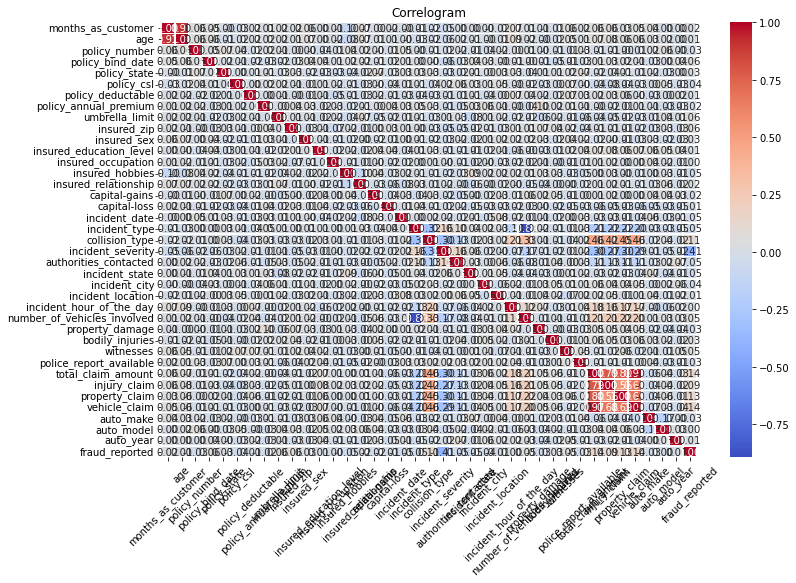

In [38]:
plt.figure(figsize=(12, 8))

sns.heatmap(correlation, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)

plt.title('Correlogram')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()

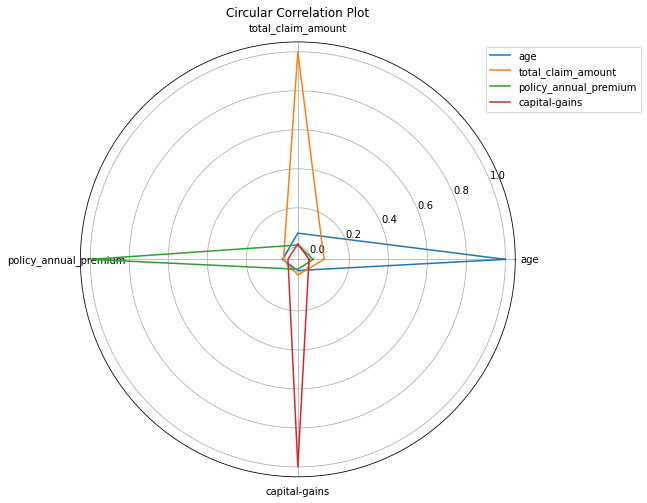

In [39]:
from circos import CircosPlot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)


angles = np.linspace(0, 2 * np.pi, len(correlation_matrix), endpoint=False).tolist()
angles += angles[:1]

for label, values in correlation_matrix.iterrows():
    values = values.values.tolist()
    values += values[:1]
    ax.plot(angles, values, label=label)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(correlation_matrix.columns, fontsize=10)
plt.title('Circular Correlation Plot')

ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

plt.show()

In [40]:
correlation['fraud_reported'].sort_values(ascending=True)

incident_severity             -0.405988
incident_state                -0.051407
incident_type                 -0.050376
incident_date                 -0.047726
insured_hobbies               -0.046838
authorities_contacted         -0.045802
incident_city                 -0.040403
policy_csl                    -0.037190
property_damage               -0.030497
policy_number                 -0.030222
police_report_available       -0.028159
auto_make                     -0.027519
capital-gains                 -0.021636
policy_annual_premium         -0.015261
incident_location             -0.008832
capital-loss                  -0.007930
auto_model                     0.000720
insured_occupation             0.001564
incident_hour_of_the_day       0.004316
policy_deductable              0.007620
auto_year                      0.007928
insured_education_level        0.008808
age                            0.012143
months_as_customer             0.017095
insured_relationship           0.021043


Removing Outliers

In [41]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.14895094e+00, 9.90836469e-01, 6.75500153e-02, ...,
        1.64574255e+00, 1.83440399e-01, 1.74601919e+00],
       [2.77600296e-01, 3.34073454e-01, 8.40045062e-01, ...,
        6.57470466e-01, 3.15490877e-01, 1.74601919e+00],
       [6.13781395e-01, 1.08891308e+00, 5.97557827e-01, ...,
        9.59702038e-01, 3.15490877e-01, 5.72731393e-01],
       ...,
       [6.53843494e-01, 5.41610567e-01, 1.39430160e+00, ...,
        2.85700476e-02, 1.51392380e+00, 5.72731393e-01],
       [1.93016186e+00, 2.52328351e+00, 1.73205167e-03, ...,
        1.28637088e+00, 1.18130295e+00, 5.72731393e-01],
       [1.92014633e+00, 2.30436250e+00, 8.14064287e-02, ...,
        6.57470466e-01, 3.15490877e-01, 5.72731393e-01]])

In [42]:
threshold=3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 262, 314, 430, 458, 503, 657, 700, 875,
       922, 975], dtype=int64), array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], dtype=int64))


Separating independent variable and target variable.

In [43]:
X = df.drop(columns=['fraud_reported'])
y = df['fraud_reported']

In [44]:
df.skew()

months_as_customer             0.092231
age                            0.478988
policy_number                  0.000000
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.063505
policy_annual_premium         -0.004022
umbrella_limit                 1.936066
insured_zip                    0.001683
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.894996
capital-loss                  -0.810352
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000


In [45]:
from sklearn.preprocessing import power_transform
X_transformed = power_transform(X)
X_transformed_df = pd.DataFrame(X_transformed, columns=X.columns)

In [46]:
X_transformed_df

months_as_customer       age  policy_number  policy_bind_date  \
0              1.108183  0.996230       0.035613          0.295554   
1              0.342195  0.422374      -0.761298          1.182937   
2             -0.534911 -1.121180       0.635901         -1.005000   
3              0.587466  0.320505      -1.261255          1.022376   
4              0.342195  0.620371      -0.648719         -1.027579   
..                  ...       ...            ...               ...   
995           -2.182071  0.001864       1.382414          0.145616   
996            0.825577  0.320505      -1.452989         -1.274913   
997           -0.577653 -0.459893       1.292462          0.219413   
998            1.745860  2.156246       0.101033          0.428897   
999            1.737919  2.002314       0.175335         -0.305815   

     policy_state  policy_csl  policy_deductable  policy_annual_premium  \
0        1.146048    0.178846           0.151847               0.830567   
1        0.071806    0.178846           1.219833              -0.240251   
2        1.146048   -1.237596           1.219833               0.854053   
3       -1.259374    0.178846           1.219833               0.862842   
4       -1.259374    1.230487           0.151847               1.315226   
..            ...         ...                ...                    ...   
995      1.146048    1.230487           0.151847               0.359508   
996     -1.259374   -1.237596           0.151847               0.926983   
997      1.146048    0.178846          -1.250840               0.709017   
998     -1.259374    1.230487           1.219833               0.591458   
999      1.146048    0.178846           0.151847              -1.962564   

     umbrella_limit  insured_zip  ...  bodily_injuries  witnesses  \
0         -0.453704     0.065905  ...         0.108332   0.517616   
1          1.870570     0.173411  ...        -1.254857  -1.410682   
2          1.870570    -2.082367  ...         1.178068   1.290743   
3          1.923059     1.055740  ...         0.108332   0.517616   
4          1.923059     1.162688  ...        -1.254857  -0.355794   
..              ...          ...  ...              ...        ...   
995       -0.453704    -1.958947  ...        -1.254857  -0.355794   
996       -0.453704     1.058573  ...         1.178068   1.290743   
997        1.585522    -1.069170  ...         1.178068   1.290743   
998        1.870570    -1.176459  ...        -1.254857  -0.355794   
999       -0.453704     1.193386  ...        -1.254857   1.290743   

     police_report_available  total_claim_amount  injury_claim  \
0                   1.207630            0.884606      0.009177   
1                  -1.248928           -1.631374     -1.360732   
2                   0.143401           -0.983733      0.379341   
3                   0.143401            0.448185     -0.055853   
4                   0.143401           -1.362780     -1.145080   
..                       ...                 ...           ...   
995                -1.248928            1.402470      1.497628   
996                -1.248928            1.594508      1.518470   
997                 1.207630            0.669974      0.321025   
998                 1.207630           -0.556381     -0.473838   
999                -1.248928           -1.639396     -1.696938   

     property_claim  vehicle_claim  auto_make  auto_model  auto_year  
0          1.132432       0.927197   0.859111   -1.808345  -0.104598  
1         -1.412791      -1.638390   0.418616   -0.586225   0.369851  
2         -0.925740      -1.072443  -0.555149    0.944905   0.369851  
3         -0.053217       0.834272  -0.828189    1.252785   1.388998  
4         -1.504408      -1.412020  -1.809810    1.022679   0.671810  
..              ...            ...        ...         ...        ...  
995        0.571751       1.370263  -0.049272   -1.194088   0.214859  
996        1.503758       1.548780   1.481528    0.787622   1.527113  
99

In [47]:
X_transformed_df.skew()

months_as_customer            -0.212356
age                           -0.027267
policy_number                 -0.288423
policy_bind_date              -0.291937
policy_state                  -0.145377
policy_csl                    -0.100769
policy_deductable             -0.111017
policy_annual_premium         -0.288883
umbrella_limit                -0.370613
insured_zip                   -0.288646
insured_sex                    0.148630
insured_education_level       -0.188564
insured_occupation            -0.239336
insured_hobbies               -0.247798
insured_relationship          -0.160421
capital-gains                  0.130054
capital-loss                  -0.623731
incident_date                 -0.264053
incident_type                 -0.088766
collision_type                -0.204204
incident_severity             -0.079282
authorities_contacted         -0.227269
incident_state                -0.255777
incident_city                 -0.181772
incident_location             -0.288423


Handling the imbalance problem

In [48]:
from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [49]:
y_resampled.value_counts()

0    608
1    608
Name: fraud_reported, dtype: int64

In [50]:
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       145
           1       0.60      0.49      0.54        55

    accuracy                           0.77       200
   macro avg       0.71      0.68      0.69       200
weighted avg       0.76      0.77      0.76       200



In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [52]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

ad = AdaBoostClassifier()
ad.fit(X_train, y_train)

svc = SVC()
svc.fit(X_train, y_train)

lg_preds = lg.predict(X_test)
dtc_preds = dtc.predict(X_test)
knn_preds = knn.predict(X_test)
gnb_preds = gnb.predict(X_test)
rf_preds = rf.predict(X_test)
ad_preds = ad.predict(X_test)
svc_preds = svc.predict(X_test)

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, lg_preds))
print("Classification Report:")
print(classification_report(y_test, lg_preds))

print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, dtc_preds))
print("Classification Report:")
print(classification_report(y_test, dtc_preds))

Logistic Regression:
Accuracy: 0.725
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.98      0.84       145
           1       0.50      0.05      0.10        55

    accuracy                           0.73       200
   macro avg       0.62      0.52      0.47       200
weighted avg       0.67      0.72      0.63       200

Decision Tree Classifier:
Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       145
           1       0.59      0.55      0.57        55

    accuracy                           0.77       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.77      0.77      0.77       200



In [53]:
from sklearn.model_selection import cross_val_score
classifiers = [lg, dtc, knn, gnb, rf, ad, svc]


for classifier in classifiers:
    scores = cross_val_score(classifier, X, y, cv=5)
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    

    print(f"Classifier: {classifier.__class__.__name__}")
    print(f"Cross-Validation Scores: {scores}")
    print(f"Mean Score: {mean_score}")
    print(f"Standard Deviation: {std_score}")
    print("\n")

Classifier: LogisticRegression
Cross-Validation Scores: [0.755 0.725 0.725 0.745 0.745]
Mean Score: 0.7390000000000001
Standard Deviation: 0.01200000000000001


Classifier: DecisionTreeClassifier
Cross-Validation Scores: [0.77  0.775 0.795 0.785 0.82 ]
Mean Score: 0.7889999999999999
Standard Deviation: 0.017720045146669326


Classifier: KNeighborsClassifier
Cross-Validation Scores: [0.705 0.71  0.66  0.695 0.725]
Mean Score: 0.6990000000000001
Standard Deviation: 0.02177154105707722


Classifier: GaussianNB
Cross-Validation Scores: [0.76  0.725 0.655 0.78  0.765]
Mean Score: 0.737
Standard Deviation: 0.044788391353117386


Classifier: RandomForestClassifier
Cross-Validation Scores: [0.775 0.77  0.785 0.765 0.815]
Mean Score: 0.782
Standard Deviation: 0.017776388834631153


Classifier: AdaBoostClassifier
Cross-Validation Scores: [0.795 0.79  0.735 0.82  0.83 ]
Mean Score: 0.7939999999999999
Standard Deviation: 0.03307567081708244


Classifier: SVC
Cross-Validation Scores: [0.75  0.75  0

In [54]:
from sklearn.model_selection import GridSearchCV
param_grid_lg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'max_iter': [100, 200, 300, 400] 
}

param_grid_dtc = {
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10]  
}


param_grids = {
    lg: param_grid_lg,
    dtc: param_grid_dtc,

}


best_classifiers = {}

for classifier, param_grid in param_grids.items():
    grid_search = GridSearchCV(classifier, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_classifiers[classifier.__class__.__name__] = grid_search.best_estimator_


for classifier_name, best_classifier in best_classifiers.items():
    print(f"Best Hyperparameters for {classifier_name}:")
    print(best_classifier)
    print("\n")

Best Hyperparameters for LogisticRegression:
LogisticRegression(C=10, max_iter=400)


Best Hyperparameters for DecisionTreeClassifier:
DecisionTreeClassifier(max_depth=10, min_samples_split=5)




In [55]:
best_lr = LogisticRegression(C=10, max_iter=400)
best_lr.fit(X_train, y_train)

best_dtc = DecisionTreeClassifier(max_depth=10, min_samples_split=5)
best_dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=5)

In [56]:
lr_preds = best_lr.predict(X_test)

dtc_preds = best_dtc.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_preds)
lr_classification_report = classification_report(y_test, lr_preds)
lr_confusion_matrix = confusion_matrix(y_test, lr_preds)

dtc_accuracy = accuracy_score(y_test, dtc_preds)
dtc_classification_report = classification_report(y_test, dtc_preds)
dtc_confusion_matrix = confusion_matrix(y_test, dtc_preds)

In [57]:
print("Logistic Regression Model Evaluation:")
print(f"Accuracy: {lr_accuracy:.2f}")
print("Classification Report:\n", lr_classification_report)
print("Confusion Matrix:\n", lr_confusion_matrix)
print("\n")

print("Decision Tree Classifier Model Evaluation:")
print(f"Accuracy: {dtc_accuracy:.2f}")
print("Classification Report:\n", dtc_classification_report)
print("Confusion Matrix:\n", dtc_confusion_matrix)

Logistic Regression Model Evaluation:
Accuracy: 0.69
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.89      0.80       145
           1       0.33      0.15      0.20        55

    accuracy                           0.69       200
   macro avg       0.53      0.52      0.50       200
weighted avg       0.62      0.69      0.64       200

Confusion Matrix:
 [[129  16]
 [ 47   8]]


Decision Tree Classifier Model Evaluation:
Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       145
           1       0.60      0.53      0.56        55

    accuracy                           0.78       200
   macro avg       0.72      0.70      0.71       200
weighted avg       0.77      0.78      0.77       200

Confusion Matrix:
 [[126  19]
 [ 26  29]]


In [58]:
svc_preds = svc.predict(X_test)

svc_accuracy = accuracy_score(y_test, svc_preds)

print("Accuracy Score for Support Vector Classifier:", svc_accuracy)

Accuracy Score for Support Vector Classifier: 0.725


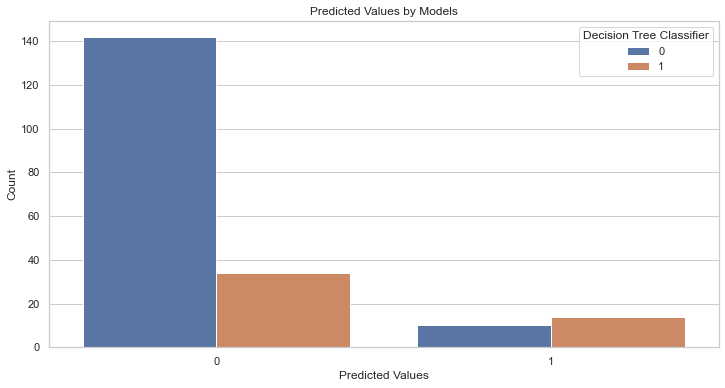

In [59]:
predictions_df = pd.DataFrame({
    'Logistic Regression': lr_preds,
    'Decision Tree Classifier': dtc_preds,
    'Support Vector Classifier': svc_preds
})

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.countplot(data=predictions_df, x='Logistic Regression', hue='Decision Tree Classifier')
plt.xlabel("Predicted Values")
plt.ylabel("Count")
plt.title("Predicted Values by Models")
plt.legend(title='Decision Tree Classifier')
plt.show()

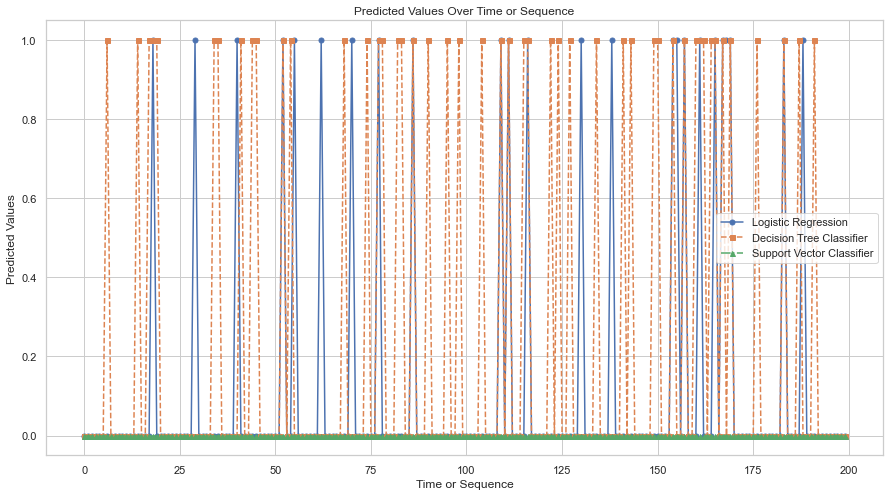

In [60]:
sequential_data = list(range(len(lr_preds)))

plt.figure(figsize=(15, 8))
plt.plot(sequential_data, lr_preds, label='Logistic Regression', marker='o', linestyle='-', markersize=5)
plt.plot(sequential_data, dtc_preds, label='Decision Tree Classifier', marker='s', linestyle='--', markersize=5)
plt.plot(sequential_data, svc_preds, label='Support Vector Classifier', marker='^', linestyle='-.', markersize=5)

plt.xlabel("Time or Sequence")
plt.ylabel("Predicted Values")
plt.title("Predicted Values Over Time or Sequence")
plt.legend()

plt.grid(True)
plt.show()